<a href="https://colab.research.google.com/github/prisqia/EDA-Olympics-2021/blob/main/EDA_Olympics_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect To Kaggle

In [82]:
! pip install kaggle

In [83]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [84]:
! cp kaggle.json ~/.kaggle/

In [85]:
! chmod 600 ~/.kaggle/kaggle.json

# Download Kaggle Dataset


In this EDA we used 2021 Olympics in Tokyo Dataset

In [86]:
! kaggle datasets download arjunprasadsarkhel/2021-olympics-in-tokyo

2021-olympics-in-tokyo.zip: Skipping, found more recently modified local copy (use --force to force download)


In [87]:
! mkdir Tokyo_Olympics

mkdir: cannot create directory ‘Tokyo_Olympics’: File exists


In [88]:
! unzip 2021-olympics-in-tokyo.zip -d Tokyo_Olympics

Archive:  2021-olympics-in-tokyo.zip
replace Tokyo_Olympics/Athletes.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Tokyo_Olympics/Athletes.xlsx  
replace Tokyo_Olympics/Coaches.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Tokyo_Olympics/Coaches.xlsx  
replace Tokyo_Olympics/EntriesGender.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Tokyo_Olympics/EntriesGender.xlsx  
replace Tokyo_Olympics/Medals.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace Tokyo_Olympics/Medals.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Tokyo_Olympics/Medals.xlsx  
replace Tokyo_Olympics/Teams.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Tokyo_Olympics/Teams.xlsx  


#Import Library

In [89]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean

# Create a Path from Data Folder

In [90]:
path_to_data = '/content/Tokyo_Olympics/'

In [91]:
df_athletes = pd.read_excel(path_to_data + 'Athletes.xlsx')
df_gender = pd.read_excel(path_to_data + 'EntriesGender.xlsx')
df_medals = pd.read_excel(path_to_data + 'Medals.xlsx')
df_teams = pd.read_excel(path_to_data + 'Teams.xlsx')

#EDA

In [92]:
df_medals

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


In [93]:
df_medals.isna().sum()

Rank             0
Team/NOC         0
Gold             0
Silver           0
Bronze           0
Total            0
Rank by Total    0
dtype: int64

In [94]:
df_medals['Total'].mean()

11.612903225806452

In [95]:
# Weighted Mean
np.average(df_medals["Total"], weights=df_medals["Gold"])

46.832352941176474

In [96]:
# Trimmed Mean
# by taking the trim mean we could make it less sensitive
trim_mean(df_medals["Total"], 0.1)

6.8933333333333335

In [97]:
from statistics import variance, stdev

variance(df_medals["Gold"])

49.315100514259

In [98]:
stdev(df_medals["Gold"])

7.022471111671376

In [99]:
def weighted_median(df, median_col, weight_col) :
  df_sorted = df.sort_values(median_col)
  cumsum = df_sorted[weight_col].cumsum()
  cutoff = df_sorted[weight_col].sum() / 2
  return df_sorted[cumsum >= cutoff][median_col].iloc[0]

weighted_median(df_medals,"Total", "Gold")


40

In [100]:
q3 = np.percentile(df_medals["Total"], 75)
q3

11.0

In [101]:
frequency_table = df_medals.copy()
frequency_table["freq"] = pd.cut(df_medals["Gold"], 10)
frequency_table.groupby("freq")["Rank"].count().reset_index() # Creates a frequency table of values based on the specified series and segment number

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


In [102]:
import matplotlib.pyplot as plt

(array([50., 11., 11.,  5.,  2.,  4.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ,
        14.3, 15.6, 16.9, 18.2, 19.5, 20.8, 22.1, 23.4, 24.7, 26. , 27.3,
        28.6, 29.9, 31.2, 32.5, 33.8, 35.1, 36.4, 37.7, 39. ]),
 <a list of 30 Patch objects>)

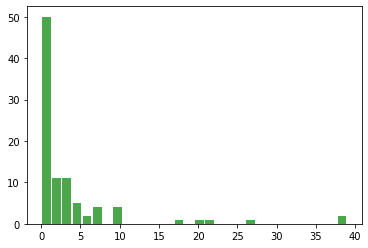

In [103]:
plt.hist(x=df_medals["Gold"], bins='auto', color='green', alpha=0.7, rwidth=0.85)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



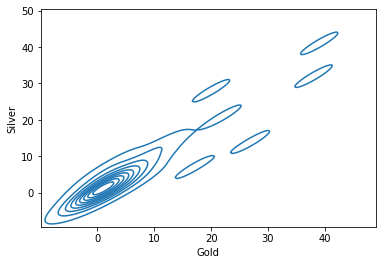

In [104]:
import seaborn as sns
ax = sns.kdeplot(df_medals["Gold"], df_medals["Silver"])